In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/SuperMarket Analysis.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df['DateTime'] = pd.to_datetime(df['Date']+" "+df['Time'])
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"])
df.dtypes

<ipython-input-122-7752c66355bd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date']+" "+df['Time'])
<ipython-input-122-7752c66355bd>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"])


,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


In [ ]:
num = []
cat = []
date_time = []
for i in df.columns:
  if df[i].dtype == "object":
    cat.append(i)
  elif df[i].dtype == "int" or df[i].dtype == "float":
    num.append(i)
  elif df[i].dtype == "datetime64[ns]":
    date_time.append(i)

print(f"Numerical Columns: {num}")
print()
print(f"Categorical Columns: {cat}")
print()
print(f"Date Columns: {date_time}")

Numerical Columns: ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

Categorical Columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']

Date Columns: ['DateTime']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,DateTime
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,2019-02-14 15:30:27.480000
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,2019-01-01 10:39:00
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,2019-01-24 17:58:45
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2019-02-13 17:37:00
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,2019-03-08 15:29:30
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,2019-03-30 20:37:00
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,NaN


In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.isna().sum()
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
for i in cat:
  if i == "Invoice ID":
    continue
  print(f"{i}:",df[i].unique(),sep="\n")
  print()

Branch:
['Alex' 'Giza' 'Cairo']

City:
['Yangon' 'Naypyitaw' 'Mandalay']

Customer type:
['Member' 'Normal']

Gender:
['Female' 'Male']

Product line:
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']

Date:
['1/5/2019' '3/8/2019' '3/3/2019' '1/27/2019' '2/8/2019' '3/25/2019'
 '2/25/2019' '2/24/2019' '1/10/2019' '2/20/2019' '2/6/2019' '3/9/2019'
 '2/12/2019' '2/7/2019' '3/29/2019' '1/15/2019' '3/11/2019' '1/1/2019'
 '1/21/2019' '3/5/2019' '3/15/2019' '2/17/2019' '3/2/2019' '3/22/2019'
 '3/10/2019' '1/25/2019' '1/28/2019' '1/7/2019' '3/23/2019' '1/17/2019'
 '2/2/2019' '3/4/2019' '3/16/2019' '2/27/2019' '2/10/2019' '3/19/2019'
 '2/3/2019' '3/7/2019' '2/28/2019' '3/27/2019' '1/20/2019' '3/12/2019'
 '2/15/2019' '3/6/2019' '2/14/2019' '3/13/2019' '1/24/2019' '1/6/2019'
 '2/11/2019' '1/22/2019' '1/13/2019' '1/9/2019' '1/12/2019' '1/26/2019'
 '1/23/2019' '2/23/2019' '1/2/2019' '2/9/2019' '3/26/2019' '3/1/2019'
 

In [ ]:
for i in num:
  print(i.upper())
  print("Mean:",df[i].mean())
  print("Median:",df[i].median())
  print("Mode:",df[i].mode(),sep="\n")
  print("Minimum:",df[i].min())
  print("Maximum:",df[i].max())
  print()

UNIT PRICE
Mean: 55.67213
Median: 55.230000000000004
Mode:
0    83.77
Name: Unit price, dtype: float64
Minimum: 10.08
Maximum: 99.96

QUANTITY
Mean: 5.51
Median: 5.0
Mode:
0    10
Name: Quantity, dtype: int64
Minimum: 1
Maximum: 10

TAX 5%
Mean: 15.379368999999999
Median: 12.088000000000001
Mode:
0     4.1540
1     4.4640
2     8.3770
3     9.0045
4    10.3260
5    10.3635
6    12.5700
7    13.1880
8    22.4280
9    39.4800
Name: Tax 5%, dtype: float64
Minimum: 0.5085
Maximum: 49.65

SALES
Mean: 322.966749
Median: 253.848
Mode:
0     87.2340
1     93.7440
2    175.9170
3    189.0945
4    216.8460
5    217.6335
6    263.9700
7    276.9480
8    470.9880
9    829.0800
Name: Sales, dtype: float64
Minimum: 10.6785
Maximum: 1042.65

COGS
Mean: 307.58738
Median: 241.76
Mode:
0     83.08
1     89.28
2    167.54
3    180.09
4    206.52
5    207.27
6    251.40
7    263.76
8    448.56
9    789.60
Name: cogs, dtype: float64
Minimum: 10.17
Maximum: 993.0

GROSS MARGIN PERCENTAGE
Mean: 4.761904762
M

In [ ]:
for i in cat:
  if i == "Invoice ID":
    continue
  print(i.upper())
  for j in num:
    print(f"{i} vs {j}")
    print(df.groupby(i)[j].agg(["mean","median","min","max","count"]))
    print("----------------------------")
    print()

BRANCH
Branch vs Unit price
             mean  median    min    max  count
Branch                                        
Alex    54.780853  53.235  10.08  99.83    340
Cairo   55.659277  54.850  10.59  99.96    332
Giza    56.609024  56.810  10.16  99.96    328
----------------------------

Branch vs Quantity
            mean  median  min  max  count
Branch                                   
Alex    5.467647     5.0    1   10    340
Cairo   5.481928     5.0    1   10    332
Giza    5.582317     6.0    1   10    328
----------------------------

Branch vs Tax 5%
             mean    median     min    max  count
Branch                                           
Alex    14.874001  11.46800  0.6045  49.49    340
Cairo   15.232024  12.04200  0.8875  48.69    332
Giza    16.052367  12.92475  0.5085  49.65    328
----------------------------

Branch vs Sales
              mean     median      min      max  count
Branch                                                
Alex    312.354031  240.8

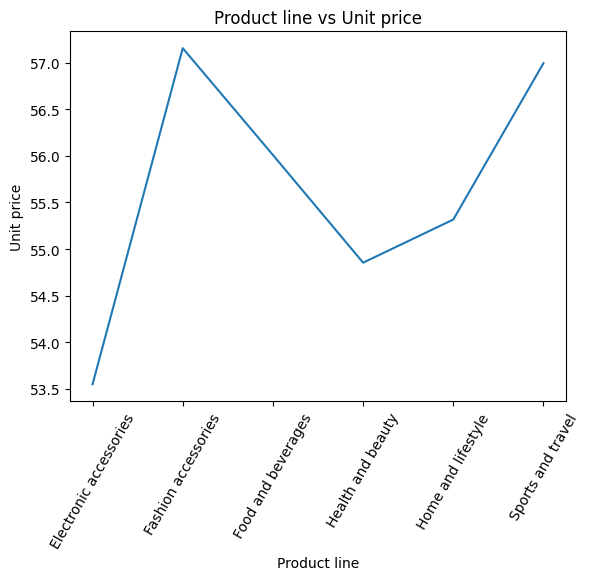

In [ ]:
a = df.groupby("Product line")["Unit price"].mean()
plt.title("Product line vs Unit price")
plt.xlabel("Product line")
plt.ylabel("Unit price")
plt.xticks(rotation=60)
plt.plot(a.index, a)
plt.show()

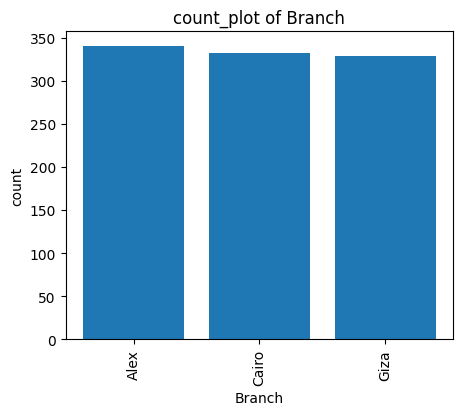

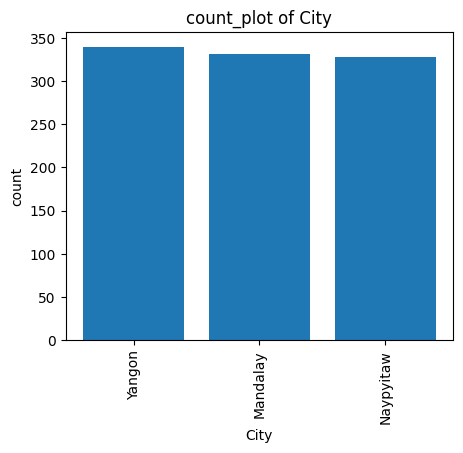

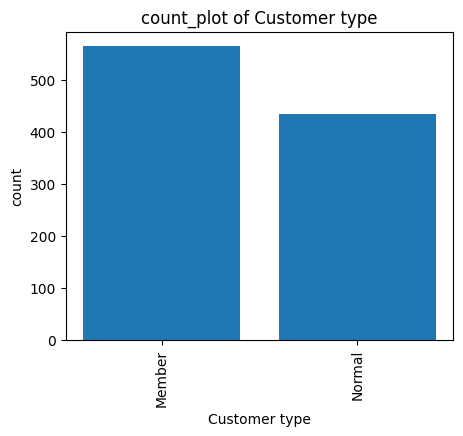

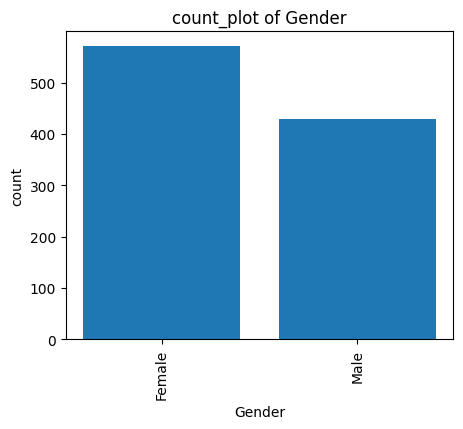

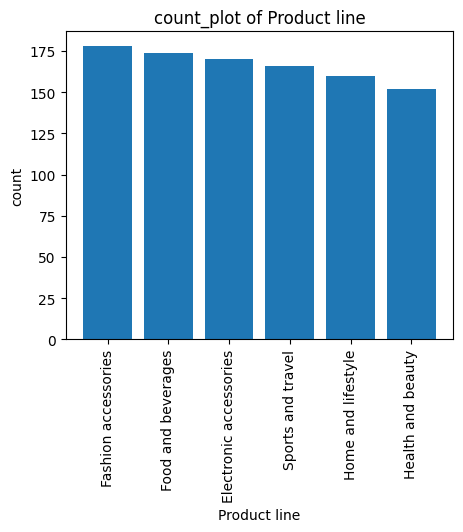

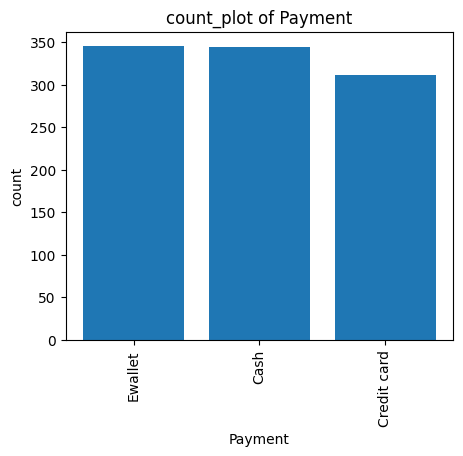

In [ ]:
for i in df:
  if df[i].dtype=='object' and df[i].nunique()<=35:
    plt.figure(figsize=(5,4))
    plt.bar(x=df[i].value_counts().index,height=df[i].value_counts())
    plt.title(f'count_plot of {i}')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('count')
    print()
plt.show()